## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

## Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

In [2]:
# import libraries and read the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('TaskDataSet/Task (2) Dataset.csv')

### Perform summary statistics on the dataset.

In [3]:
# check the first 5 rows of the dataset and the info
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
46873,Kuwait,2023-07-28 22:01:00,14,60,241.6,22.8,13,62.878687,65.068668
975,Abudhabi,2023-08-16 23:01:30,4,9,24.1,2.0,4,57.961435,55.745109
43680,Kuwait,2023-03-16 03:01:30,4,7,24.1,2.7,5,57.826860,56.677497
18249,Dammam,2023-09-21 15:46:30,13,37,136.2,33.0,9,66.490240,65.670817
116,Abudhabi,2023-07-12 04:31:30,4,1,3.3,0.1,4,53.230349,50.872421


In [4]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_14059/3576338382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='JamsCount', data=df, palette='viridis')


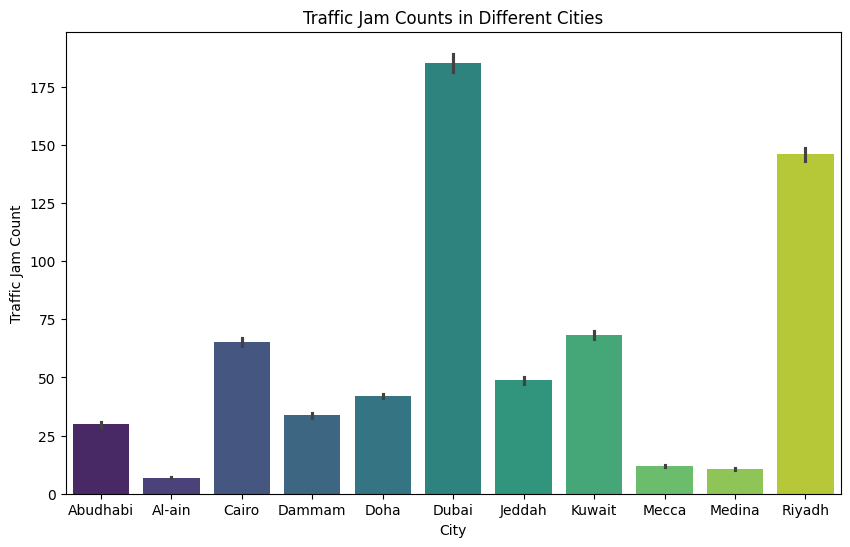

In [5]:
# let's use matplotlib and seaborn to visualize the data
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='JamsCount', data=df, palette='viridis')
plt.title('Traffic Jam Counts in Different Cities')
plt.xlabel('City')
plt.ylabel('Traffic Jam Count')
plt.show()
# we can see that Dubai has the highest number of traffic jams followed by Riyadh

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

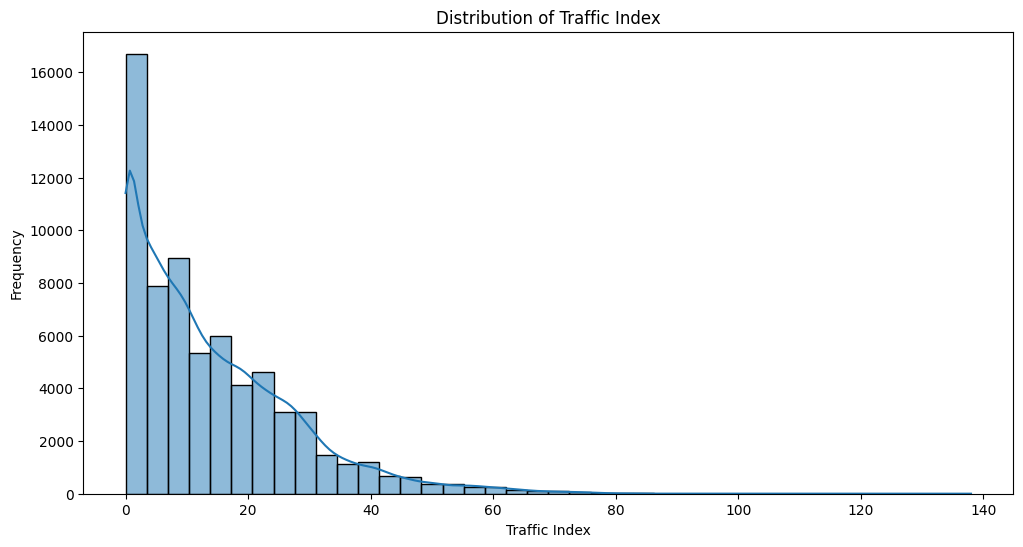

In [6]:
# we will see the fre
# we need to convert the date column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Plot the distribution of Traffic_Index
plt.figure(figsize=(12, 6))
sns.histplot(df['TrafficIndexLive'], bins=40, kde=True)
plt.title('Distribution of Traffic Index')
plt.xlabel('Traffic Index')
plt.ylabel('Frequency')
plt.show()


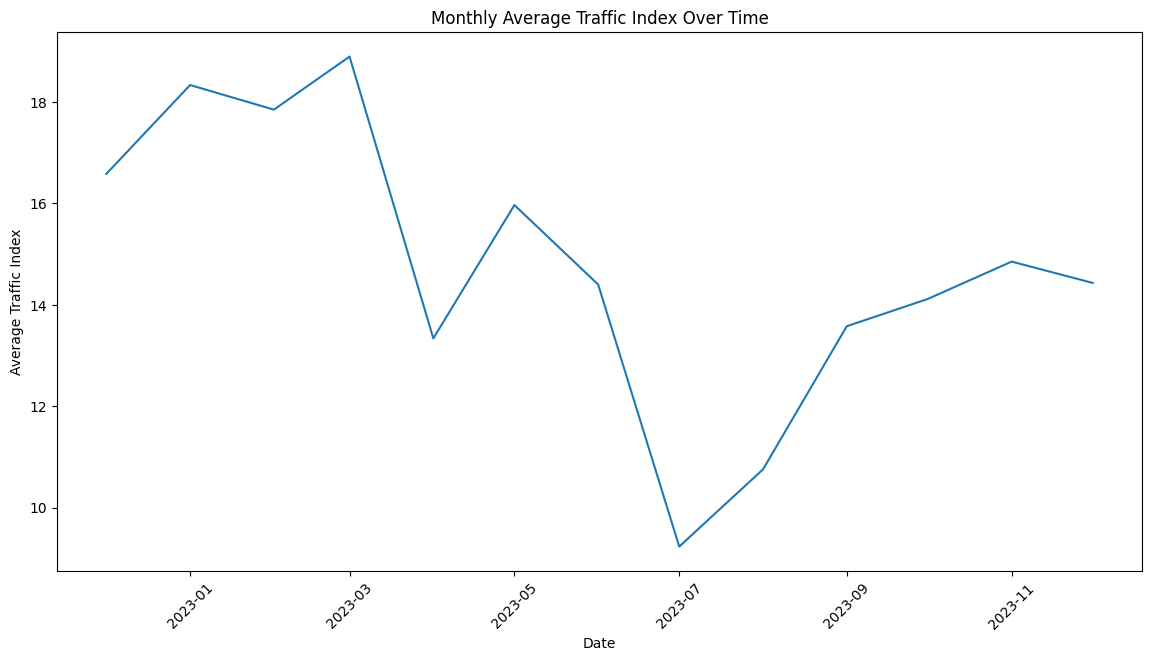

In [7]:
# we examine the average traffic index for each month of the year
# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# take the year and month from the 'Datetime' column
df['YearMonth'] = df['Datetime'].dt.to_period('M')
# now we can calculate the mean traffic index for each month
monthly_avg = df.groupby('YearMonth')['TrafficIndexLive'].mean().reset_index()
# Convert 'YearMonth' back to datetime for plotting
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()

# Plot the monthly average
plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='TrafficIndexLive', data=monthly_avg)
plt.title('Monthly Average Traffic Index Over Time')
plt.xlabel('Date')
plt.ylabel('Average Traffic Index')
plt.xticks(rotation=45)
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


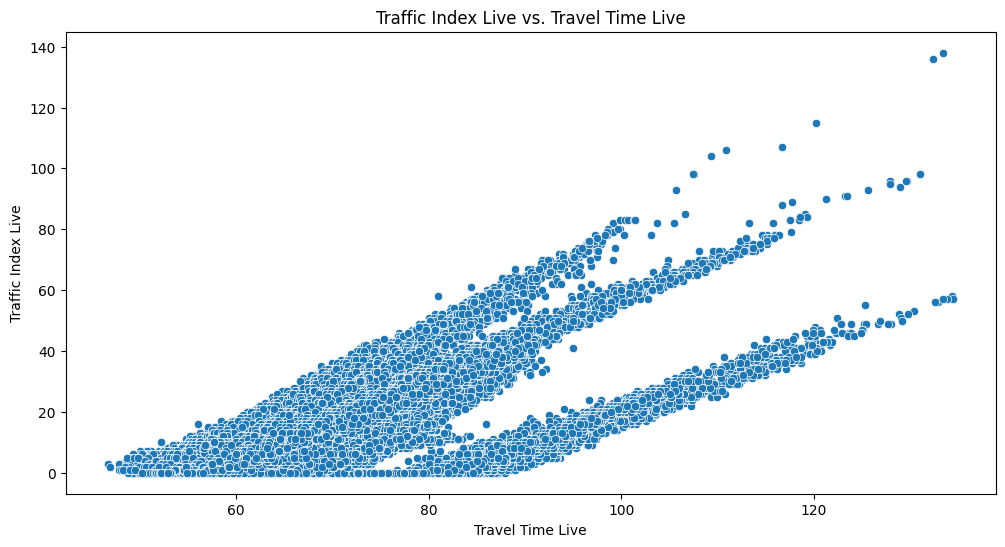

Correlation coefficient between TrafficIndexLive and TravelTimeLive: 0.6423255497124013


In [8]:
# Scatter plot to visualize the relationship between TrafficIndexLive and TravelTimeLive
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TravelTimeLive', y='TrafficIndexLive', data=df)
plt.title('Traffic Index Live vs. Travel Time Live')
plt.xlabel('Travel Time Live')
plt.ylabel('Traffic Index Live')
plt.show()

# Calculate the correlation coefficient
correlation = df['TrafficIndexLive'].corr(df['TravelTimeLive'])
print(f'Correlation coefficient between TrafficIndexLive and TravelTimeLive: {correlation}')



## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


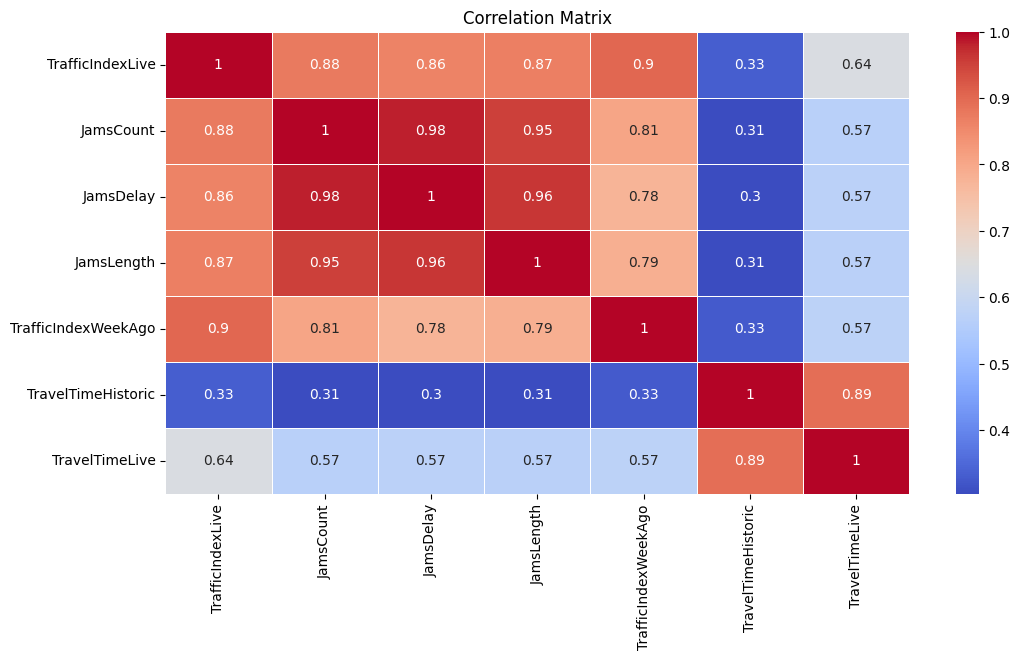

In [9]:
# Heatmap to visualize the correlation matrix
correlation_matrix = df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 
                         'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

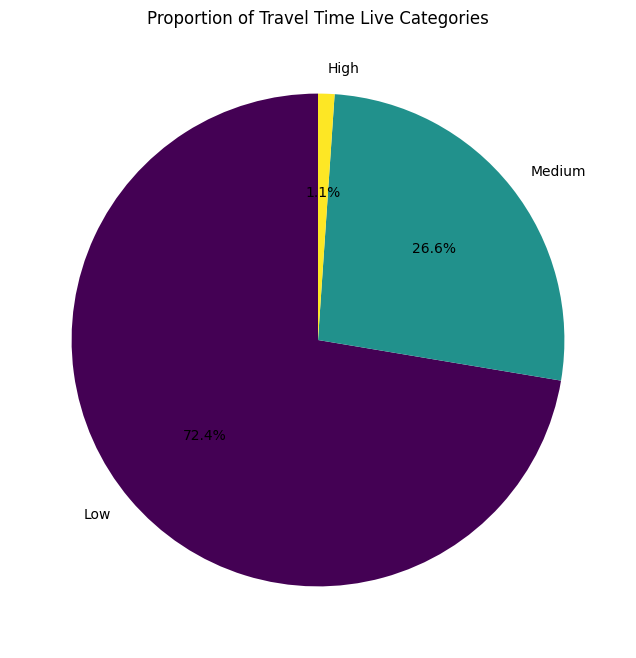

In [10]:

# pie chart to show the proportion of different Weather Conditions
# let's categorize the TravelTimeLive column into 3 categories
df['TravelTimeLive'] = pd.cut(df['TravelTimeLive'], bins=3, labels=['Low', 'Medium', 'High'])
# Plot the pie chart
plt.figure(figsize=(8, 8))
df['TravelTimeLive'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Proportion of Travel Time Live Categories')
plt.ylabel('')
plt.show()


## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

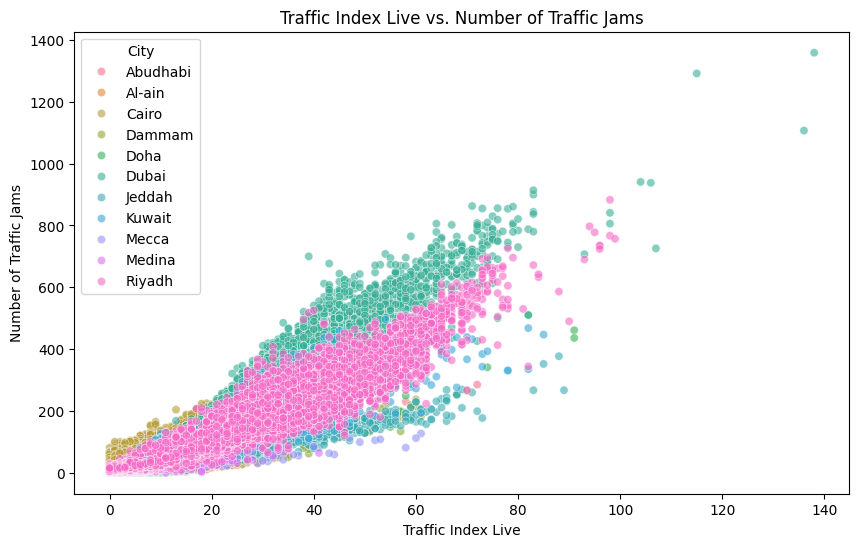

In [11]:
# let's see the total traffic jams in each city
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TrafficIndexLive', y='JamsCount', hue='City', alpha=0.6)
plt.title('Traffic Index Live vs. Number of Traffic Jams')
plt.xlabel('Traffic Index Live')
plt.ylabel('Number of Traffic Jams')
plt.legend(title='City')
plt.show()